<a href="https://colab.research.google.com/github/DhongariPavan/play-Store-App-Review-Analysis/blob/main/CH_DHONGARI_PAVAN_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Python Capstone Project/Copy of Play Store Data.csv'
app_df = pd.read_csv(path)

In [6]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# first thing we need to do is cleaning the data if there is any discrepency
#Checking shape of dataframe
app_df.shape

(10841, 13)

In [77]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          8892 non-null   float64       
 3   Reviews         10357 non-null  object        
 4   Size            10357 non-null  object        
 5   Installs        10357 non-null  int64         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  object        
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
 13  year            10357 non-null  period[A-DEC] 
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)

In [76]:
#Checking null values
app_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
year                 0
dtype: int64

In [75]:
app_df['Android Ver'].fillna('Varies with device',inplace=True)
app_df['Current Ver'].fillna('Varies with device',inplace=True)

In [9]:
#droping the rows which are duplicates, key is compared for all columns
app_df.drop_duplicates(inplace=True)

In [10]:
app_df.shape

(10358, 13)

In [11]:
# Describe
app_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10358,10358,8893.000000,10358,10358,10358,10357,10358,10357,10358,10358,10350,10355
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,593,1526,1488,9591,9592,8382,842,298,1302,2379
mean,NaN,NaN,4.189542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.545452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Checking unique values for Column
app_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [13]:
# Delete row 10742 as data is inconsistent/wrong
app_df[app_df['Last Updated']=='1.0.19']
app_df.drop(10472,inplace=True)

In [15]:
#Checking unique values for Genres
#Geners is a sub category which has different types in Category
app_df.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [17]:
app_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [18]:
# We need to change data in standard Format, it's format is String need to convert to Date Format
app_df['Last Updated'] = pd.to_datetime(app_df['Last Updated'])
app_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

In [19]:
# We will check if we have any inappropriate data in Version
app_df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [20]:
# the data cleaning part is completed, now we need to do find some insights in the data

In [21]:
# Genres wise count, it will depict most commonly used Genres
app_df.Genres.value_counts()

Tools                                  842
Entertainment                          588
Education                              527
Business                               427
Medical                                408
                                      ... 
Racing;Pretend Play                      1
Parenting;Brain Games                    1
Board;Pretend Play                       1
Health & Fitness;Action & Adventure      1
Card;Brain Games                         1
Name: Genres, Length: 119, dtype: int64

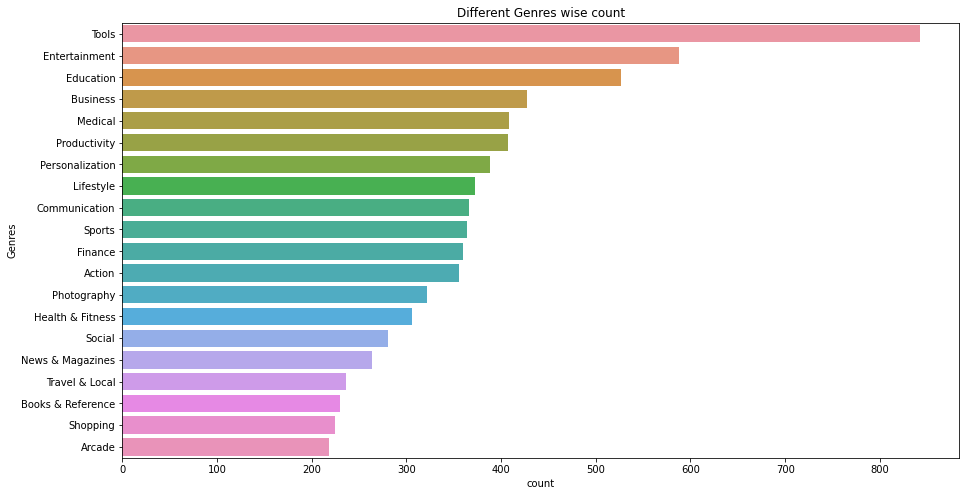

In [22]:
# visualizing Size wise count 
plt.figure(figsize = (15,8))
sns.countplot(y='Genres',data=app_df,order=app_df.Genres.value_counts().head(20).index)
plt.title('Different Genres wise count')
plt.show()

In [23]:
# We are taking year wise count of App Updation
app_df['year'] = app_df['Last Updated'].dt.to_period('Y')

In [24]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018


In [25]:
app_df.year.value_counts().sort_values()

2010       1
2011      15
2012      26
2013     108
2014     204
2015     454
2016     789
2017    1826
2018    6934
Freq: A-DEC, Name: year, dtype: int64

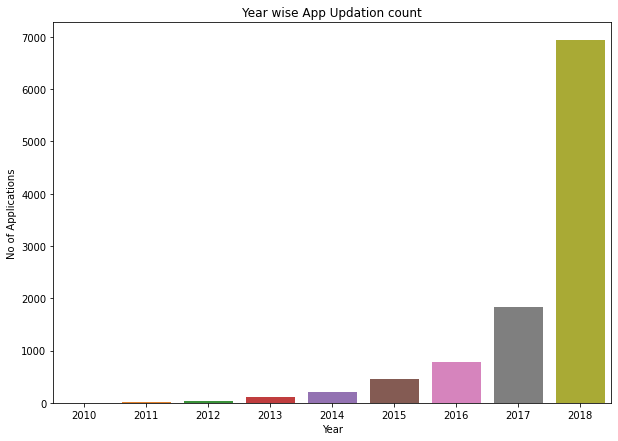

In [26]:
plt.figure(figsize = (10,7))
sns.countplot(x='year',data=app_df,order=app_df.year.value_counts().sort_values().index)
plt.title('Year wise App Updation count')
plt.xlabel('Year')
plt.ylabel('No of Applications')
plt.show()

In [28]:
# these are the applications whose last update date is less than 2015,we have 354 applications which needed work to push updates
app_df1 = app_df[app_df['year'] <= '2016']
app_df1.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,Auto & Vehicles,2014-08-26,1.0.1,2.2 and up,2014
66,Used Cars Mexico,AUTO_AND_VEHICLES,4.0,190,2.5M,"50,000+",Free,0,Everyone,Auto & Vehicles,2016-10-14,1.0,2.3 and up,2016


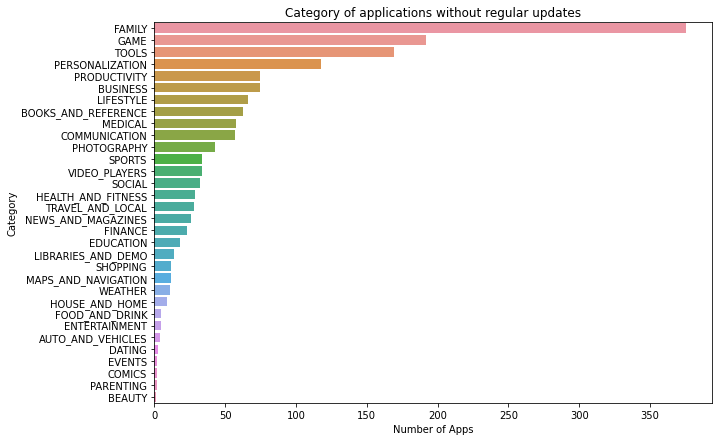

In [29]:
# This plot shows what category of applications are not being updated regularly, Year taken is below 2016
# app_df1.Category.value_counts().sort_values(ascending=False)
plt.figure(figsize = (10,7))
sns.countplot(y='Category',data=app_df1,order=app_df1.Category.value_counts().sort_values(ascending=False).index)
plt.title('Category of applications without regular updates')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

In [30]:
# Apps which are updated regularly
app_df2 = app_df[app_df['year'] == '2018']
app_df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device,2018
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,2018-06-13,2.0.20,4.0.3 and up,2018
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up,2018
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018


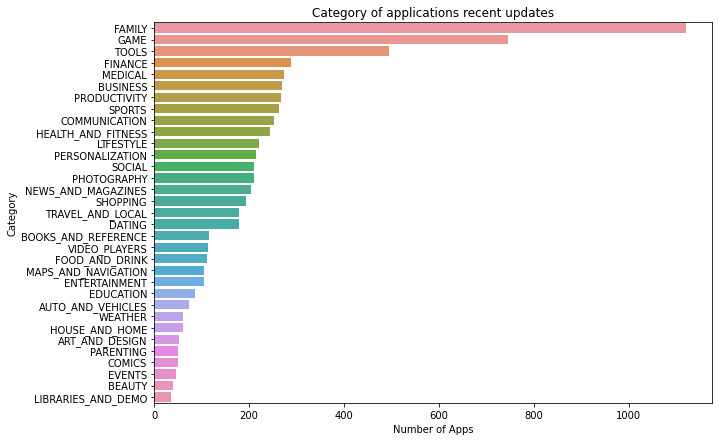

In [31]:
# This plot shows what category of applications are  being updated regularly, Year taken is  equal to 2018
# app_df2.Category.value_counts().sort_values(ascending=False)
plt.figure(figsize = (10,7))
sns.countplot(y='Category',data=app_df2,order=app_df2.Category.value_counts().sort_values(ascending=False).index)
plt.title('Category of applications recent updates')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

In [32]:
# this data shows how many applications support what range of android version
app_df['Android Ver'].value_counts()

4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             894
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 6.0                1
4.1 - 7.1.1              1
5.0 - 7.1.1              1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
Name: Android Ver, dtype: int64

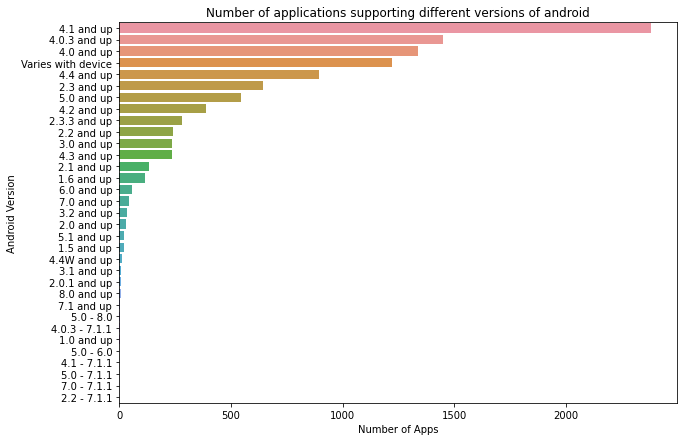

In [33]:
plt.figure(figsize = (10,7))
sns.countplot(y='Android Ver',data=app_df,order=app_df['Android Ver'].value_counts().index)
plt.title('Number of applications supporting different versions of android')
plt.xlabel('Number of Apps')
plt.ylabel('Android Version')
plt.show()

In [60]:
# Checking which genre has number of installs
# app_df['Installs'] = app_df['Installs'].str.replace('+','')
# app_df['Installs'] = app_df['Installs'].str.replace(',','')
# app_df['Installs'] = app_df['Installs'].astype(int)
# app_df.head()
app_df.groupby(['Genres'])['Installs'].sum().sort_values(ascending=False)

Genres
Communication                   24152276251
Social                          12513867902
Productivity                    12463091369
Tools                           11442771915
Photography                      9721247655
                                   ...     
Books & Reference;Education           11000
Board;Pretend Play                      100
Books & Reference;Creativity            100
Trivia;Education                        100
Role Playing;Education                  100
Name: Installs, Length: 119, dtype: int64

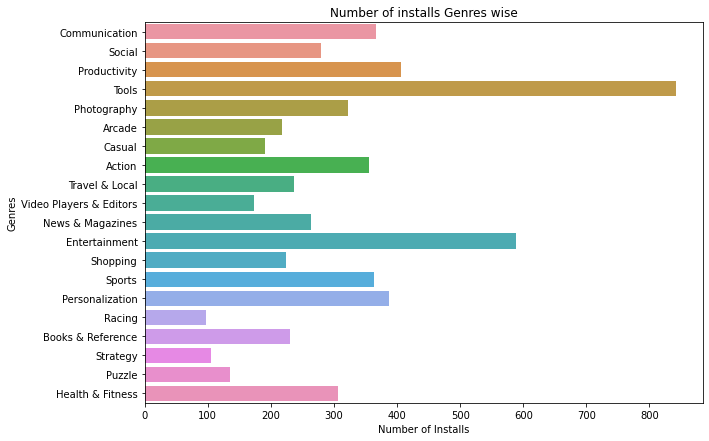

In [61]:
#Plotting which genres has number of installs
plt.figure(figsize = (10,7))
sns.countplot(y='Genres',data=app_df,order=app_df.groupby(['Genres'])['Installs'].sum().sort_values(ascending=False).head(20).index)
plt.title('Number of installs Genres wise')
plt.xlabel('Number of Installs')
plt.ylabel('Genres')
plt.show()

In [81]:
# app_df.groupby('Genres')['Android Ver'].count()
app_df.groupby(['Genres','Android Ver'])['Android Ver'].count().sort_values(ascending=False).head(20)

Genres            Android Ver       
Tools             4.1 and up            135
Entertainment     4.1 and up            131
Tools             4.0 and up            126
Education         4.1 and up            121
Sports            4.1 and up            112
Business          4.1 and up            110
Tools             Varies with device     98
Lifestyle         4.1 and up             98
Tools             4.0.3 and up           94
Education         4.0 and up             93
Productivity      Varies with device     92
Communication     Varies with device     88
Action            4.1 and up             86
Medical           4.0.3 and up           85
Arcade            4.1 and up             83
News & Magazines  4.1 and up             80
Health & Fitness  4.1 and up             80
Personalization   4.1 and up             78
Entertainment     4.0.3 and up           77
Medical           4.1 and up             77
Name: Android Ver, dtype: int64

In [86]:
plt.figure(figsize = (10,7))
sns.countplot(y='Android Ver',data=app_df,order=app_df.groupby(['Genres','Android Ver'])['Android Ver'].count().sort_values(ascending=False).head(20).index)
plt.title('Number of installs Genres wise')
plt.xlabel('Number of Installs')
plt.ylabel('Genres')
plt.show()

ValueError: ignored

<Figure size 720x504 with 0 Axes>

In [72]:
type(app_df['Genres'][0])

str